# ARIMA Time Series Modeling
## Jessica Schmidt

# PART I: Research Question

## A1. Research Question for Time Series Modeling
Can we accurately forecast daily revenue from the data in the medical time series dataset via ARIMA Time Series Modeling? 

## A2. Goals of the Analysis
The goals of the analysis are to accurately forecast the daily revenue from the medical time series dataset provided by creating an ARIMA time series model from a training and test set split of 80-20. In other words, the ARIMA time series model will use 80% of the data to predict the other 20%.

# PART II: Method Justification

## B. Assumptions of Time Series Modeling (Stationarity and Autocorrelated Data) (Source: D213 Webinars)
Assumptions of time series modeling are
1. The data must be stationary (no trend or seasonality)
2. The data is univariate
3. The data does not contain anomalies
4. Data from the past indicates behavior of future data

# PART III: Data Preparation

## C1. Line Graph Visualizing Realization of Time Series (source: D213 Webinars)

In [1]:
# Importing Relevant Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Importing Dataset
df = pd.read_csv('/Users/astro/Downloads/medical_time_series .csv')

# Examining Dataset
df.info

<bound method DataFrame.info of      Day    Revenue
0      1   0.000000
1      2  -0.292356
2      3  -0.327772
3      4  -0.339987
4      5  -0.124888
..   ...        ...
726  727  15.722056
727  728  15.865822
728  729  15.708988
729  730  15.822867
730  731  16.069429

[731 rows x 2 columns]>

In [2]:
pd.set_option("display.max_columns", None)
df

,Day,Revenue
0,1,0.000000
1,2,-0.292356
2,3,-0.327772
3,4,-0.339987
4,5,-0.124888
...,...,...
726,727,15.722056
727,728,15.865822
728,729,15.708988
729,730,15.822867


In [3]:
# Converting Day column to date because time series models prefer date structure
start_date = pd.to_datetime('2020-01-01')
df['Day'] = pd.to_timedelta(df['Day']-1, unit='D') + start_date

# Rename Day to Date for posterity
df.columns = ['date', 'revenue']

# Set day as index
df.set_index('date', inplace=True)

df

,revenue
date,
2020-01-01,0.000000
2020-01-02,-0.292356
2020-01-03,-0.327772
2020-01-04,-0.339987
2020-01-05,-0.124888
...,...
2021-12-27,15.722056
2021-12-28,15.865822
2021-12-29,15.708988


<function matplotlib.pyplot.show(close=None, block=None)>

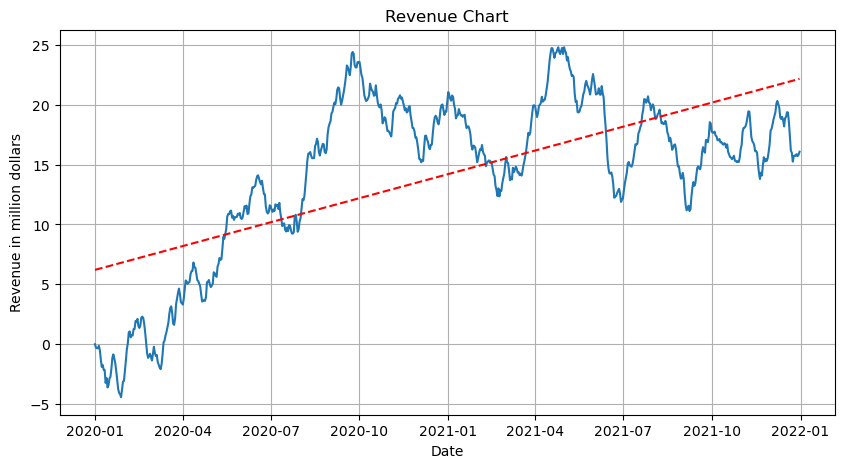

In [4]:
# Visualize the data
plt.figure(figsize=(10,5))
plt.plot(df.revenue)
plt.title('Revenue Chart')
plt.xlabel('Date')
plt.ylabel('Revenue in million dollars')
plt.grid(True)

# Create a trendline
x = mdates.date2num(df.index)
y = df.revenue
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), "r--")
plt.show

## C2. Time Step Formatting
The time series now has a DateTime format index with a daily observation of revenue (MM$) for the medical time series dataset. The increments of the index are daily from 2020 to 2021, i.e., 2020-01-01, 2020-01-02, etc. There are 731 rows/observations/days.

## C3. Evaluation of Stationarity of Time Series

Given the graph above of the data with the trendline in C2, we can see that the data is indeed not stationary. This is because data that is stationary should not have a trend, but the data above has a positive trendline. In this case, we will need to address stationarity as part of data preparation below in C4 for the time series model to answer the research question from part A.

## C4. Steps to Prepare the Data (w/Training and Test Set Split) (source: D213 Webinars)

To prepare the data for analysis, we will need to perform the following:
- Detecting and correcting missingness
- Changing the Day column to DateTime format (completed in C1)
- Making the corrected Date column the index (completed in C1)
- Data needs to be stationary (completed below)
- Training and Test Set Split

In [5]:
# Data Cleaning
# Detecting missingness
df.isnull().any()

revenue    False
dtype: bool

In [6]:
# Drop any null columns
df = df.dropna()

In [7]:
df.isnull().values.any()

False

In [8]:
# Checking for missing values
df.isna().sum()

revenue    0
dtype: int64

In [9]:
# Performing Augmented Dicky-Fuller (ADF)
#adfuller = adfuller(df.revenue)

# Result test-statistic and p-value
#print(f"the test statistic of adfuller test is {round(adfuller[0], 4)}, which has a p-value of {round(adfuller[1], 4)}")

the test statistic of adfuller test is -17.3748, which has a p-value of 0.0


<Axes: xlabel='date'>

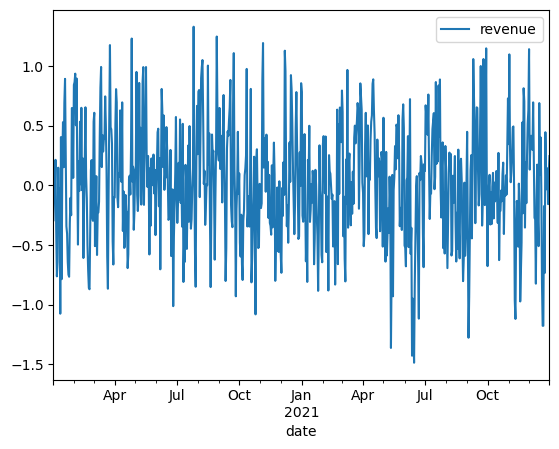

In [10]:
# The data is non-stationary, therefore, we must make it stationary
df_trans = df.diff().dropna()

# Performing adfuller test on transformed data
adfuller_results = adfuller(df_trans.revenue)

# Print
print(f"the test statistic of adfuller test is {round(adfuller_results[0], 4)}, which has a p-value of {round(adfuller_results[1], 4)}")

# Plot to verify stationarity
df_trans.plot()

The results from the plot above indicate that the data is now stationary. In other words, there is no apparent trend in the data, so we can now proceed with creating the training and test sets.

In [11]:
# Splitting data into training and test sets
train, test = train_test_split(df_trans, test_size=0.2, shuffle=False, random_state=369)
train

,revenue
date,
2020-01-02,-0.292356
2020-01-03,-0.035416
2020-01-04,-0.012215
2020-01-05,0.215100
2020-01-06,-0.366702
...,...
2021-08-03,-0.694370
2021-08-04,-0.282765
2021-08-05,0.104732


In [12]:
test

,revenue
date,
2021-08-08,0.263991
2021-08-09,-0.588690
2021-08-10,-0.550427
2021-08-11,0.081477
2021-08-12,-0.146587
...,...
2021-12-27,-0.032693
2021-12-28,0.143766
2021-12-29,-0.156834


## C5. Copy of Cleaned Dataset

In [13]:
# Cleaned Training set
train.to_csv('/Users/astro/Downloads/d213_task1_train_clean.csv')

# Cleaned Test set
test.to_csv('/Users/astro/Downloads/d213_task1_test_clean.csv')

# PART IV: Model Identification and Analysis

## D1. Annotated Findings with Visualizations

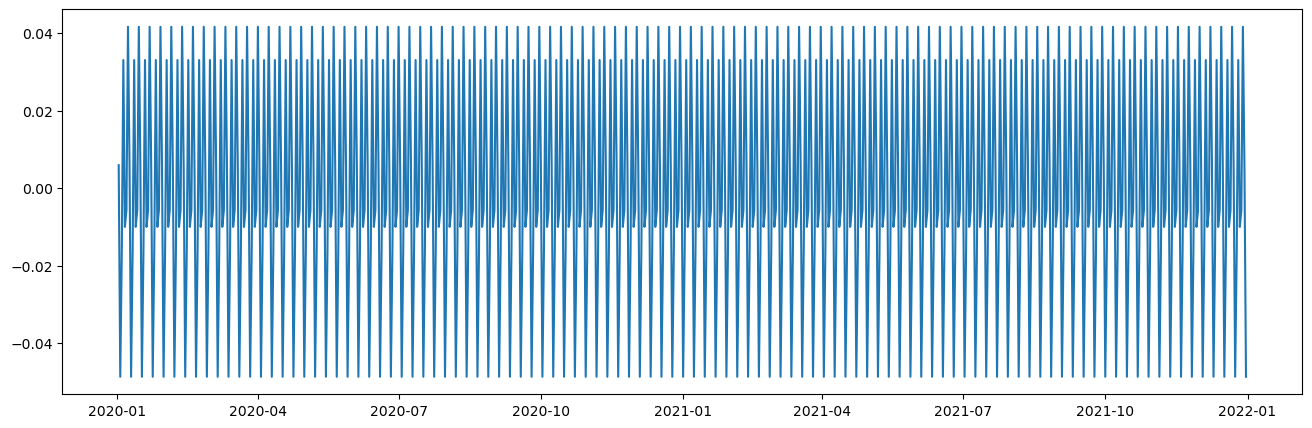

In [14]:
# Seasonality
decomposed_data = seasonal_decompose(df_trans)
plt.figure(figsize = [16,5])
plt.plot(decomposed_data.seasonal)

Based on this graph of the decomposed data, we can see that there is some seasonality. To determine the cause behind this pattern, we will analyze the data differently with a new graph:

(18262.0, 18292.0)

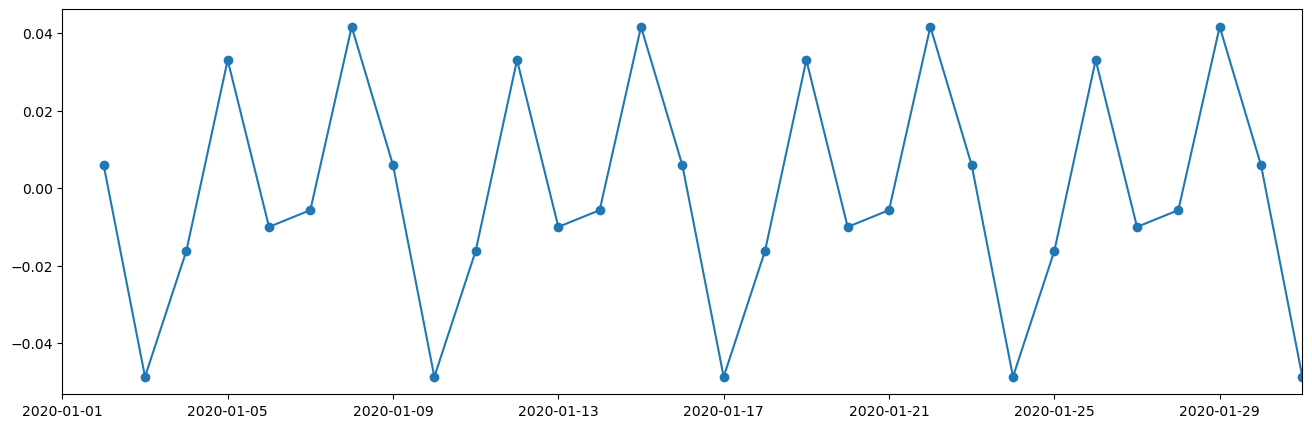

In [15]:
plt.figure(figsize = [16,5])
plt.plot(decomposed_data.seasonal, marker = 'o')
plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2020-01-31'))

Based on this model of the first month of 2020, we can see that it is likely that the seasonality we are seeing is due to the weeks of the month. In this case, the impact of this degree of seasonality is very small (approximately +/- 0.04 based on the decomposed data graph. Since the results of the ADF test show that the data is stationary, we can proceed with this minor seasonality.

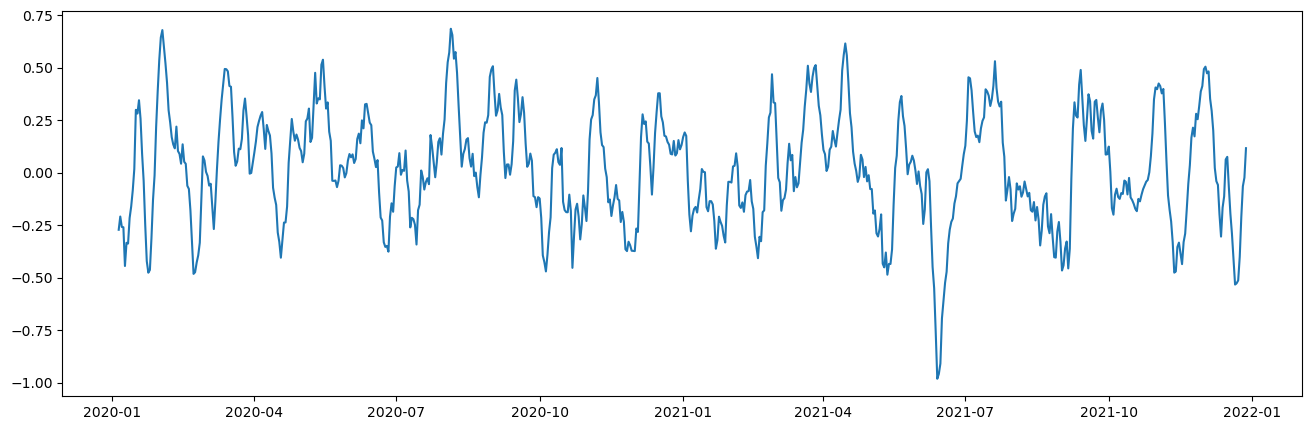

In [16]:
# Trends
plt.figure(figsize = [16,5])
plt.plot(decomposed_data.trend)

Here, we can see that there does not seem to be a trend in the dataset, indicating that our treatment of the stationarity was successful.

C:\Users\astro\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


(-0.6, 0.6)

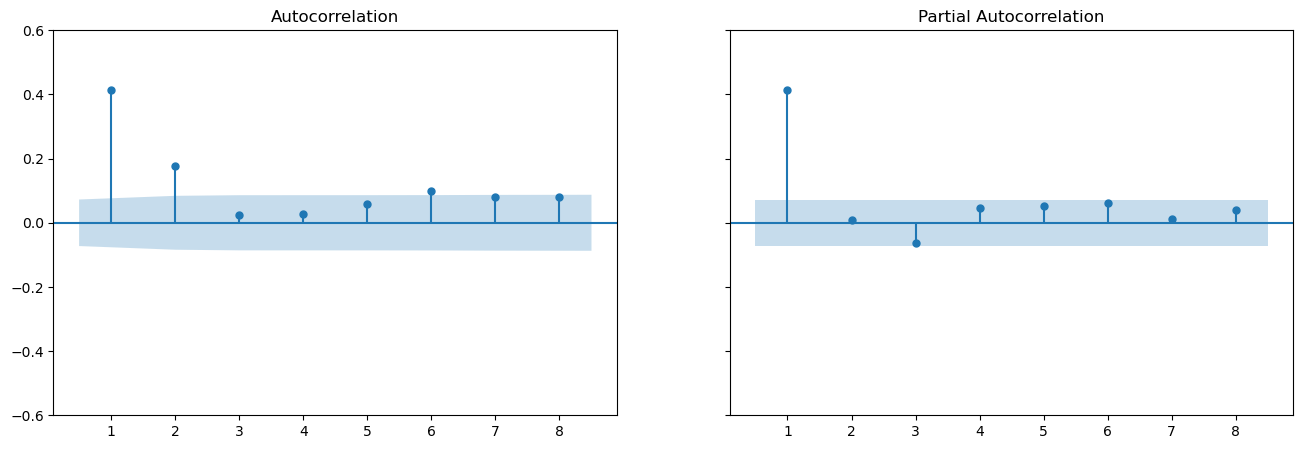

In [17]:
# Autocorrelation Function
fig, (ax1, ax2) = plt.subplots(1,2,figsize=[16,5],sharey=True)
plot_acf(df_trans,lags=8,zero=False,ax=ax1)
plot_pacf(df_trans,lags=8,zero=False,ax=ax2)
plt.ylim(-0.6,0.6)

Here, the shaded area helps with statistical significance - anything outside of the shaded area is statistically significant. These ACF and PACF can help to determine whether the model is autoregression or moving average. Based on the DataCamp modules for this class, we can see that this data would work best with an AR1 model. (Source: D213 DataCamp Lessons)

(array([0.32257506, 0.40884703, 0.49108501, 0.59363947, 0.44995182,
        0.43635387, 0.5357234 , 0.16305364, 0.34293175, 0.41847817,
        0.1854376 , 0.38567299, 0.39874179, 0.1799679 , 0.17853729,
        0.28365529, 0.1610269 , 0.10640454, 0.53767765, 0.46046065,
        0.11950937, 0.19963337, 0.36416991, 0.26380782, 0.1623704 ,
        0.15866557, 0.08052751, 0.40736853, 0.22936871, 0.22299038,
        0.8777625 , 0.48053998, 0.42173172, 0.38112086, 0.98119354,
        0.35808748, 0.15519901, 0.39425909, 0.36036735, 0.25216393,
        0.2264646 , 0.08593259, 0.15464965, 0.19248573, 0.22499538,
        0.67046396, 0.55864956, 0.255673  , 0.1297722 , 0.18896368,
        0.27492621, 0.17285359, 0.24883683, 0.20734247, 0.14470371,
        0.1810512 , 0.01763434, 0.11846138, 0.14886074, 0.03217488,
        0.08328853, 0.15081611, 0.16255357, 0.1569423 , 0.19494704,
        0.15886441, 0.09868138, 0.04977481, 0.07095888, 0.09345138,
        0.08781674, 0.03171429, 0.06113389, 0.14

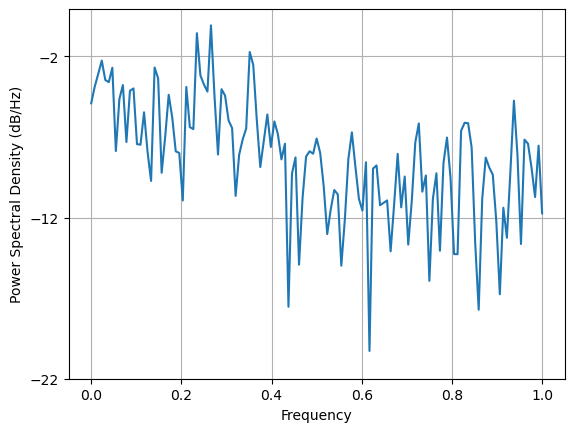

In [18]:
# Spectral Density
plt.psd(x=df_trans.revenue)

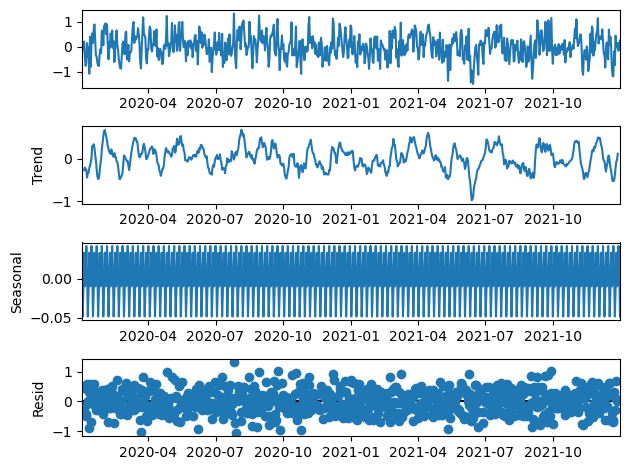

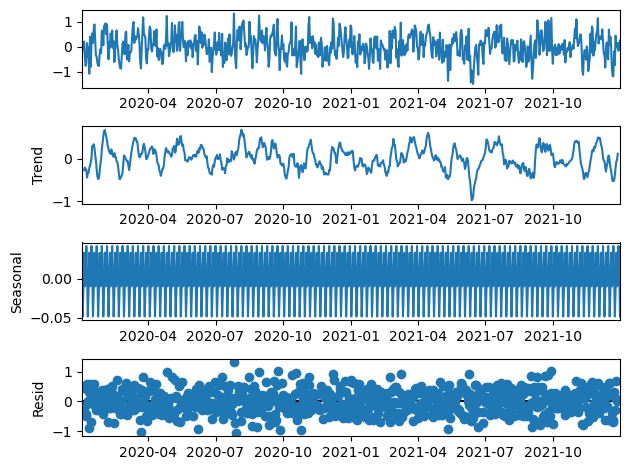

In [19]:
# Decomposed Time Series
decomposed_data.plot()

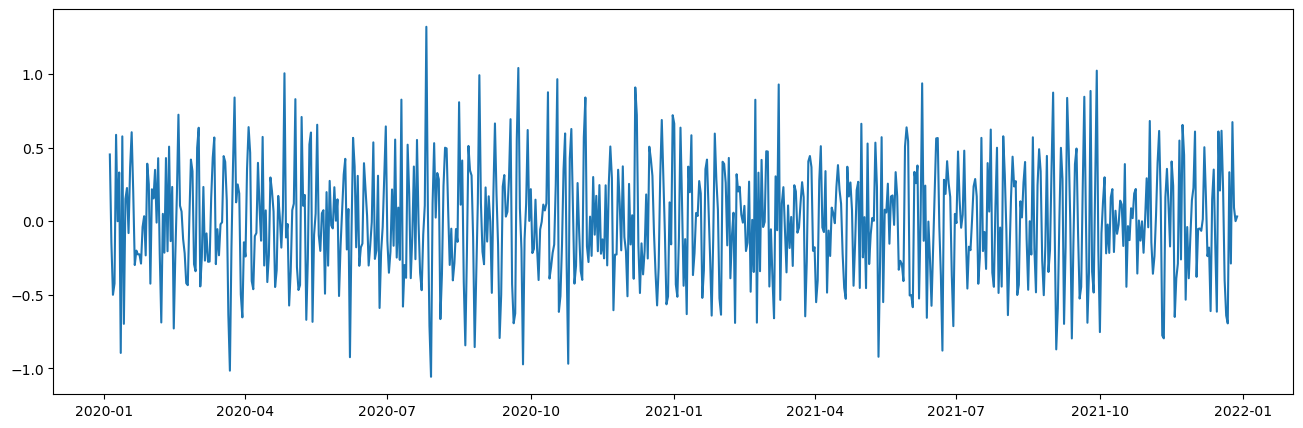

In [20]:
# Confirmation of lack of trends in the residuals of the decomposed series
# No trend found
plt.figure(figsize = [16,5])
plt.plot(decomposed_data.resid)

## D2. ARIMA Model
From above, we will be using an AR1 (first-order autoregressive) Model.

In [21]:
model = ARIMA(train, order=(1,0,0), freq='D')
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                revenue   No. Observations:                  584
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -350.349
Date:                Tue, 09 Jul 2024   AIC                            706.698
Time:                        19:38:26   BIC                            719.808
Sample:                    01-02-2020   HQIC                           711.808
                         - 08-07-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0328      0.031      1.063      0.288      -0.028       0.093
ar.L1          0.4079      0.038     10.748      0.000       0.333       0.482
sigma2         0.1943      0.012     15.948      0.0

C:\Users\astro\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


With these results, the ARIMA equation is
$$ X_t = 0.4079(X_{(t-1)}) + 0.0194 + a_t $$

## D3. Forecast using ARIMA Model (source: D213 DataCamp Lessons)
The test set of the data has 146 rows, which is what we will base the forecast on.

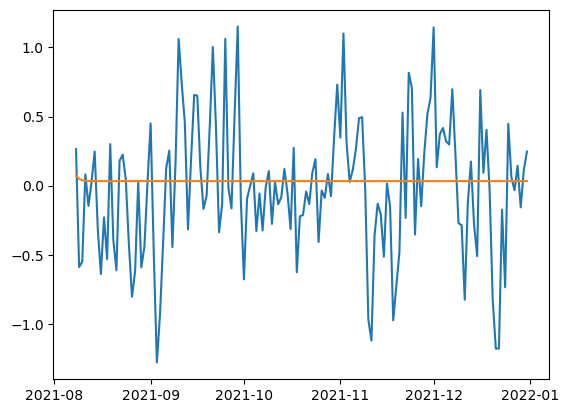

In [22]:
forecast = results.get_prediction(start = 584, end = 729, dynamic = True)
plt.plot(test)
plt.plot(forecast.predicted_mean)

In [23]:
print(forecast.predicted_mean)

2021-08-08    0.071071
2021-08-09    0.048405
2021-08-10    0.039159
2021-08-11    0.035388
2021-08-12    0.033850
                ...   
2021-12-27    0.032791
2021-12-28    0.032791
2021-12-29    0.032791
2021-12-30    0.032791
2021-12-31    0.032791
Freq: D, Name: predicted_mean, Length: 146, dtype: float64


Unfortunately, the forecast is not very effective. We can see that the ARIMA is predicting that revenue will increase over time by the amounts above (i.e., 0.032791 is the difference from 2021-12-30 to 2021-12-31).

Next, we can instead plot the predicted vs the observed data and check the confidence intervals (CIs).

In [24]:
forecast_df = pd.DataFrame(forecast.predicted_mean)
forecast_df.rename(columns = {'predicted_mean':'revenue'}, inplace = True)
df_forecast = pd.concat([train.copy(), forecast_df.copy()])
df_forecast = df_forecast.cumsum()
df_forecast

,revenue
2020-01-02,-0.292356
2020-01-03,-0.327772
2020-01-04,-0.339987
2020-01-05,-0.124888
2020-01-06,-0.491590
...,...
2021-12-27,24.033683
2021-12-28,24.066474
2021-12-29,24.099265
2021-12-30,24.132056


In [25]:
# Confidence Intervals
confidence_intervals = forecast.conf_int()
confidence_intervals

,lower revenue,upper revenue
2021-08-08,-0.792856,0.934998
2021-08-09,-0.884621,0.981430
2021-08-10,-0.904871,0.983190
2021-08-11,-0.910461,0.981237
2021-08-12,-0.912301,0.980001
...,...,...
2021-12-27,-0.913421,0.979002
2021-12-28,-0.913421,0.979002
2021-12-29,-0.913421,0.979002
2021-12-30,-0.913421,0.979002


In [26]:
last_row = pd.DataFrame({'lower revenue': [19.312734], 'upper revenue' : [19.312734], 'date': ['2021-08-07']})
last_row['date'] = pd.to_datetime(last_row['date'])
last_row.set_index('date', inplace=True)
last_row

,lower revenue,upper revenue
date,,
2021-08-07,19.312734,19.312734


In [27]:
confidence_intervals = pd.concat([last_row, confidence_intervals])
confidence_intervals = confidence_intervals.cumsum()
confidence_intervals = confidence_intervals.loc['2021-08-08':'2021-12-31']
confidence_intervals

,lower revenue,upper revenue
2021-08-08,18.519878,20.247732
2021-08-09,17.635257,21.229163
2021-08-10,16.730386,22.212353
2021-08-11,15.819925,23.193590
2021-08-12,14.907624,24.173592
...,...,...
2021-12-27,-110.230261,158.297627
2021-12-28,-111.143681,159.276629
2021-12-29,-112.057102,160.255632
2021-12-30,-112.970523,161.234634


<function matplotlib.pyplot.show(close=None, block=None)>

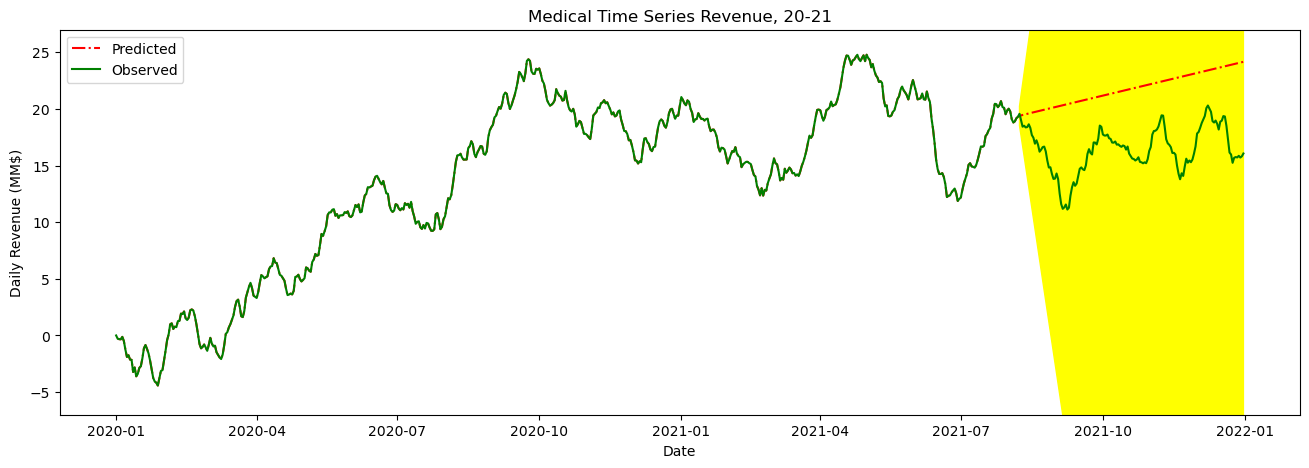

In [28]:
# Graph of findings
plt.figure(figsize = [16,5])
plt.title("Medical Time Series Revenue, 20-21")
plt.xlabel("Date")
plt.ylabel("Daily Revenue (MM$)")
plt.plot(df_forecast, color = 'red', linestyle = 'dashdot')
plt.plot(df,color='green')
plt.fill_between(confidence_intervals.index, confidence_intervals['lower revenue'], confidence_intervals['upper revenue'], color = 'yellow')
plt.ylim(-7,27)
plt.legend(['Predicted', 'Observed'])
plt.show

Here, we can see the revenue of the provided medical time series dataset showing the forecast from the 80-20 train-test split of the data. We can also see that the confidence interval is very large (seen in yellow). 

Furthermore, to further evaluate the model, we will check the root mean squared error and other diagnostic graphs below.

In [29]:
RMSE = mean_squared_error(df.loc['2021-08-08':'2021-12-31'], df_forecast.revenue.loc['2021-08-08' : '2021-12-31'], squared=False)
print(f"The RMSE of the forecast model is {round(RMSE,5)}")

The RMSE of the forecast model is 5.7584


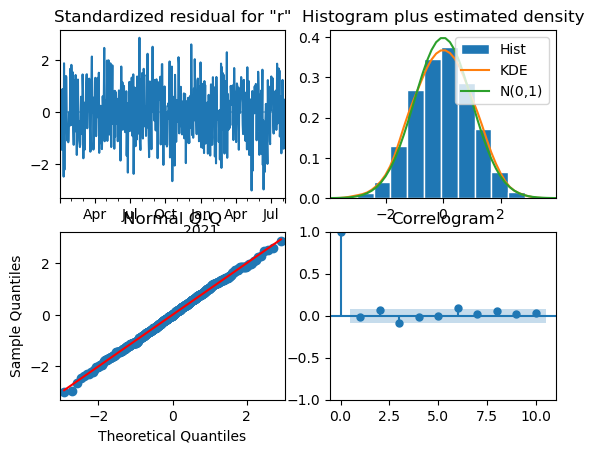

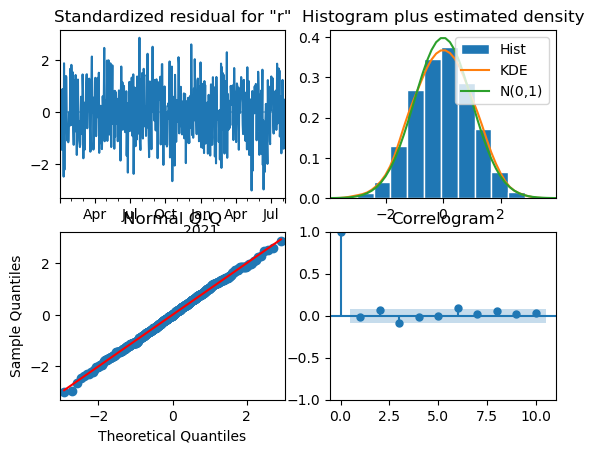

In [30]:
results.plot_diagnostics()

## D4. Output and Calculations of the Analysis
Please see the output and calculations of the analysis above.

## D5. Code of Implementation of Time Series Model
Please see the code of implementation of time series model above.

# PART V: Data Summary and Implications

## E1. Results of the Analysis
Please refer to the graphs above for visualizations of results. 

The chosen AR1 ARIMA model was thus selected because the ACF droped off at 2 and the PACF dropped off at 1, which means that the AR! model is the best for this dataset. In other words, the ARIMA model has 1-0-0 order. Based on this, we can see that the ARIMA model has an equation for this analysis of

$$ X_t = 0.4079(X_{(t-1)}) + 0.0194 + a_t $$

Next, the prediction interval of the forecast was 146 steps post training data because 146 rows equates to the 20% of the data as per the training and testing split. Essentially, this is 20% of two years worth of data. 80-20 is considered a good percentage for the training and test split, and it makes sense because there is ample data for the revenue over two years based on the split.

The model evaluation procedure and error metric can also be seen above. In this case, we used the Root Mean Squared Error (RMSE), which turned out to be 5.7584. As always, the lower the RMSE, the better, so this model is relatively good. Next, there is the diagnostic plots from above: the standardized residual plot (no trends/patterns), histogram with KDE estimate (the closer to the normal distribution, the better - this one matches up well), the Normal Q-Q plot (the datapoints are on the red line, which is optimal), and finally the correlogram (any correlations should be insignificant in the shaded area, which they are). In other words, the diagnostic plots look very good for this model.

For the research question from part A, I can confirm that this model accurately forecasted revenue for the medical time series dataset.

## E2. Annotated Visualization of Forecast of Final Model compared to Test Set

<function matplotlib.pyplot.show(close=None, block=None)>

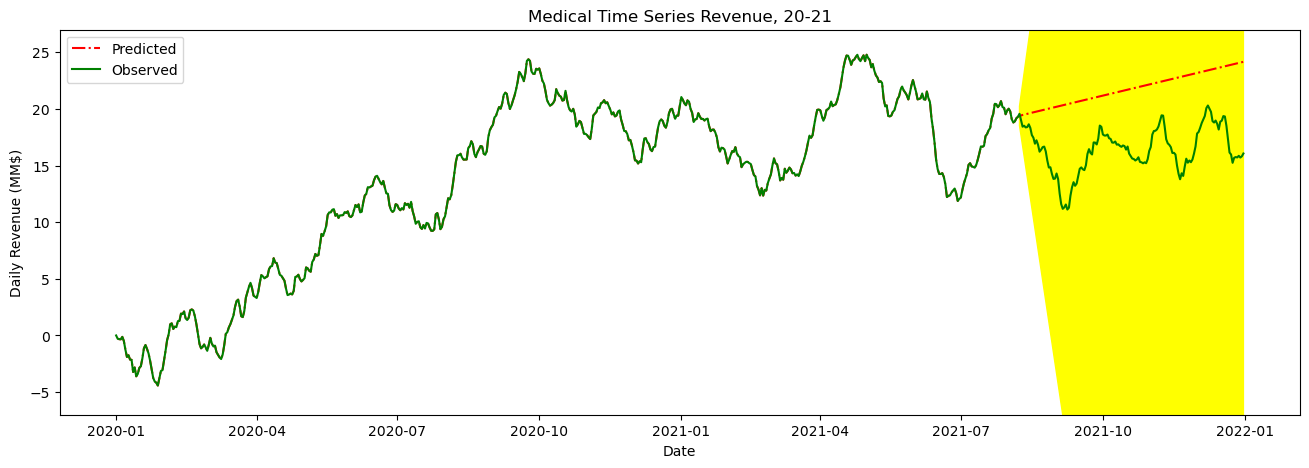

In [31]:
plt.figure(figsize = [16,5])
plt.title("Medical Time Series Revenue, 20-21")
plt.xlabel("Date")
plt.ylabel("Daily Revenue (MM$)")
plt.plot(df_forecast, color = 'red', linestyle = 'dashdot')
plt.plot(df,color='green')
plt.fill_between(confidence_intervals.index, confidence_intervals['lower revenue'], confidence_intervals['upper revenue'], color = 'yellow')
plt.ylim(-7,27)
plt.legend(['Predicted', 'Observed'])
plt.show

Here, we can see that the forecast shows a slight increase in daily revenue over time, and the forecast aligns with part D1.

## E3. Recommended Course of Action
The recommended course of action for this analysis is to perform further analyses over time when there is more data. As with the research question, since the model was accurate in forecasting the revenue for the medical time series dataset, I feel that it would be helpful to perform this type of analysis frequently - potentially quarterly or annually to see changes over time and to compare the forecast to actual revenue. Overall, I am pleased with the results of this model and think it would be great to do again in the future with new data. I think the results of this analysis would be more impactful if there was more data over a larger timeframe, and I would thus recommend repeating this analysis once there is more data (i.e., once there are more years worth of data).